<h1>Crime Prediction using LSTM</h1>

In [ ]:
# Importing Libaries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# loding the dataset
df = pd.read_csv('Community_Crime_Statistics_20240522.csv')
df.head()

,Community,Category,Crime Count,Year,Month
0,01B,Assault (Non-domestic),1,2022,11
1,01B,Break & Enter - Commercial,1,2019,6
2,01B,Break & Enter - Commercial,1,2019,8
3,01B,Break & Enter - Commercial,2,2020,3
4,01B,Break & Enter - Commercial,2,2020,7


<h1>Data Dictionary</h1>

In [ ]:
from tabulate import tabulate 

# Creating a data dictionary
data_dictionary = {
    "Community Name": "The name of the community in Calgary",
    "Category": "The type of crime that occured",
    "Crime Count": "The number of crimes that occured in that month",
    "Year": "The year that crime occured",
    "Month": "The month that crime occured",
    
}
        
# Converting the dictionary to a list of lists
table_data = [[key, value] for key, value in data_dictionary.items()]

# Creating the table with headers
table = tabulate(table_data, headers=["Column Name", "Description"], tablefmt="grid")

print(table)

+----------------+-------------------------------------------------+
| Column Name    | Description                                     |
+================+=================================================+
| Community Name | The name of the community in Calgary            |
+----------------+-------------------------------------------------+
| Category       | The type of crime that occured                  |
+----------------+-------------------------------------------------+
| Crime Count    | The number of crimes that occured in that month |
+----------------+-------------------------------------------------+
| Year           | The year that crime occured                     |
+----------------+-------------------------------------------------+
| Month          | The month that crime occured                    |
+----------------+-------------------------------------------------+


<h1>Data Processing</h1>

In [3]:
df.shape

(70661, 5)

In [4]:
# checking for missing values
df.isnull().sum()

Community      0
Category       0
Crime Count    0
Year           0
Month          0
dtype: int64

In [5]:
# checking for the datatypes
df.dtypes

Community      object
Category       object
Crime Count     int64
Year            int64
Month           int64
dtype: object

In [6]:
# Descriptive statistics
df.describe()

,Crime Count,Year,Month
count,70661.000000,70661.000000,70661.000000
mean,2.855748,2020.618616,6.369242
std,3.664965,1.825330,3.451445
min,1.000000,2018.000000,1.000000
25%,1.000000,2019.000000,3.000000
50%,2.000000,2021.000000,6.000000
75%,3.000000,2022.000000,9.000000
max,111.000000,2024.000000,12.000000


<h1>Exploratory Data Analysis</h1>

In [7]:
# In EDA we analyze the data to understsnd trends and patterns in the data. Through EDA analysis we will be able to understand data better and bulid model for prediction.


<h1>Community Distribution</h1>

Text(0, 0.5, '')

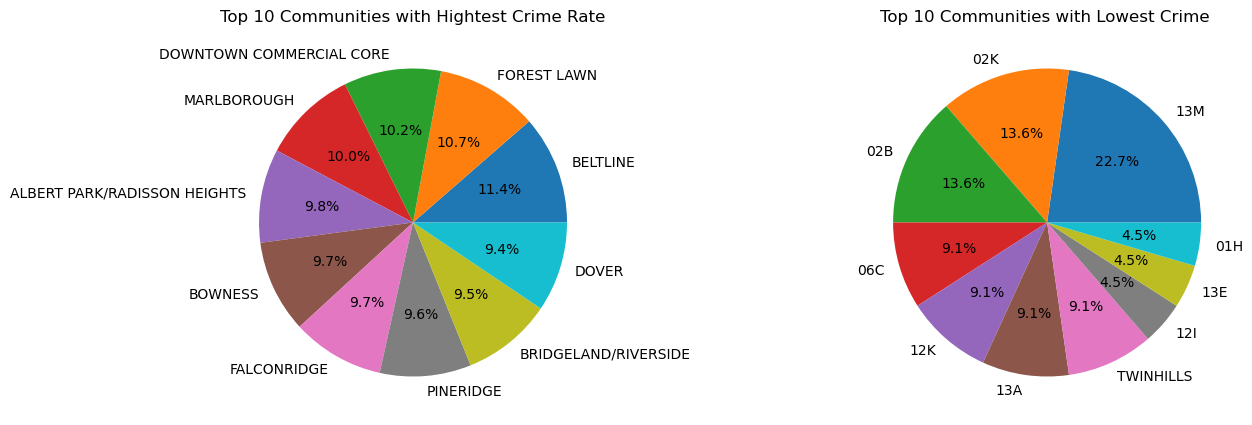

In [ ]:

fig, ax = plt.subplots(1,2,figsize=(15,5))

# Top 10 communities with Highest Crime Rate
df['Community'].value_counts().head(10).plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Top 10 Communities with Hightest Crime Rate')
ax[0].set_ylabel('')

#Top 10 Communities with Lowest Crime Rate
df['Community'].value_counts().tail(10).plot.pie(autopct='%1.1f%%', ax=ax[1])
ax[1].set_title('Top 10 Communities with Lowest Crime ')
ax[1].set_ylabel('')

These pie chart shows the distribution of crimes in each community. The first pie chart shows the top most dangerous communities in Calgary.The second pie chart shows the distribution of top 10 safest communities in Calgary.The second pie chart shows the distribution of top 10 safest communities in Calgary.In the first pie chart, Beltline is the most dangerous community in Calgary with 11.4% of the top crimes in number, followed by Foest Lawn with 10.7% and Downtown Commmercial Core with 10.2%. In the second pie chart the safest community is 13M with 22.7% of the least crimes in number, followed by 02K with 13.6% and 02B with 13.6%

<h1>Crime Category Distribution</h1>

Text(0, 0.5, '')

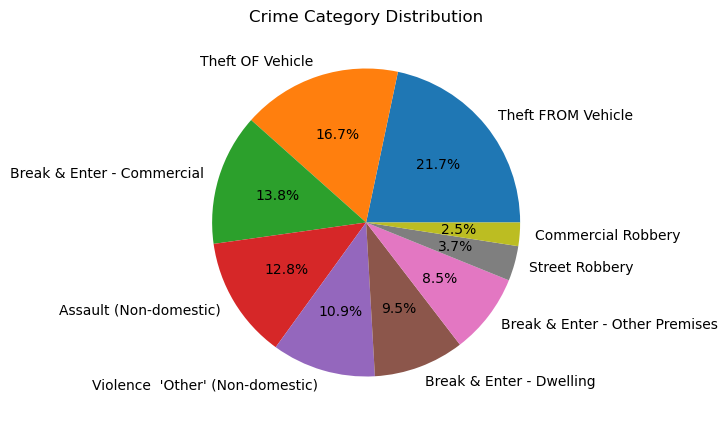

In [ ]:

plt.figure(figsize=(5,5))
df['Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Crime Category Distribution')
plt.ylabel('')

The raph shows the distribution of crimes in each category by the number of crimes. The top crime category is Theft from Vehicle with 21.7% of total crimes, followed by Theft of Vehicle with 16.7% and Break and Enter-Commercial with 13.8%. The least crime category includes commercial or street robbery.

<h1>Crime Reportings Over the Years</h1>

Text(0.5, 1.0, 'Crime Reportings by Year')

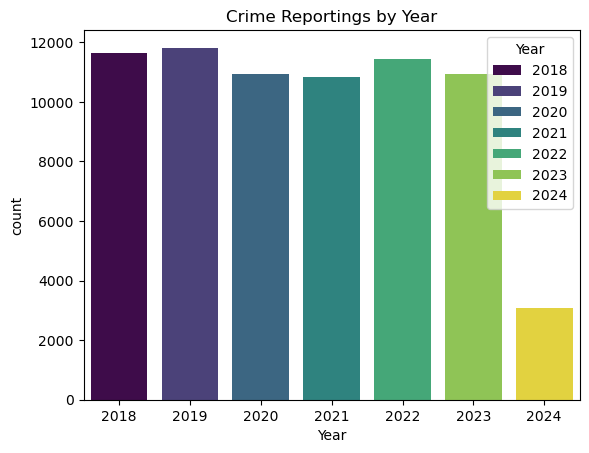

In [ ]:

sns.countplot(x = 'Year', data = df, hue = 'Year', palette='viridis').set_title('Crime Reportings by Year')

The bar graph shoes the distribution of crimes reported in the year.The year 2019 had the highest reportings of crimes followed by 2022 and 2018.The crime reportings in 2024 are less as dataset contains data till April 2024.

<h1>Crime Reportings by Month</h1>

Text(0.5, 1.0, 'Crime Reporting by Month')

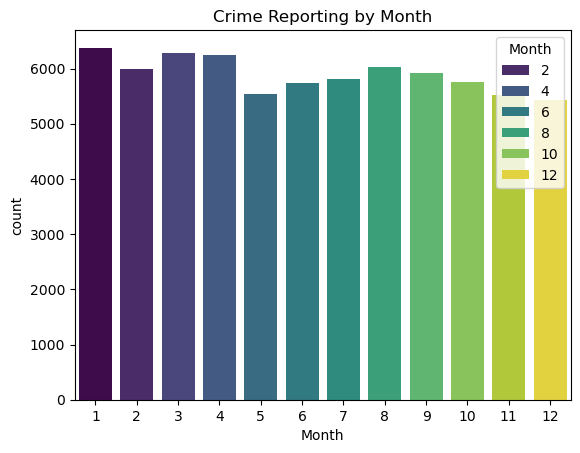

In [ ]:
sns.countplot(x = 'Month', data = df, hue = 'Month', palette='viridis').set_title('Crime Reporting by Month')

<h1>Community and Category Analysis</h1>

Text(0.5, 1.0, 'Top 5 Most safest Community and Crime Category')

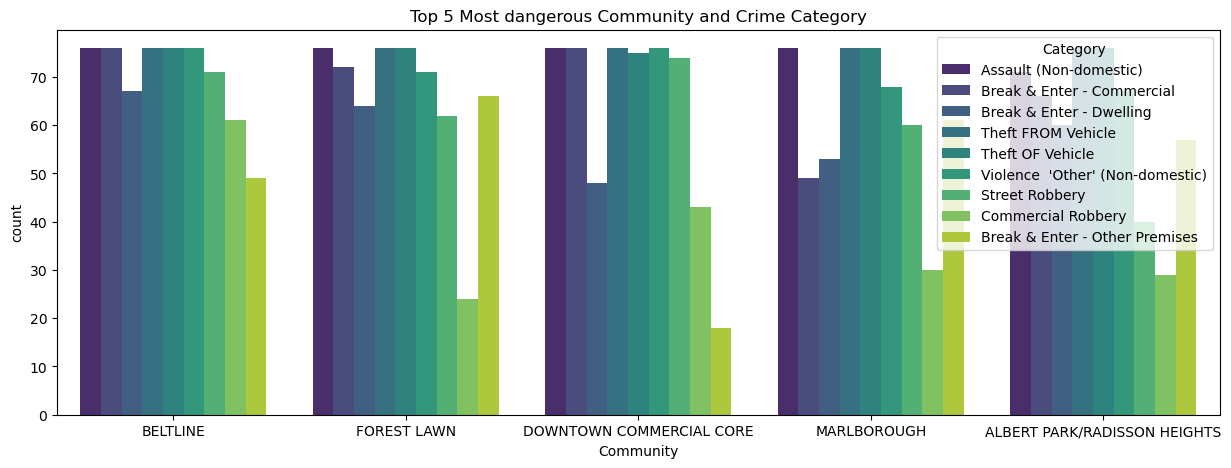

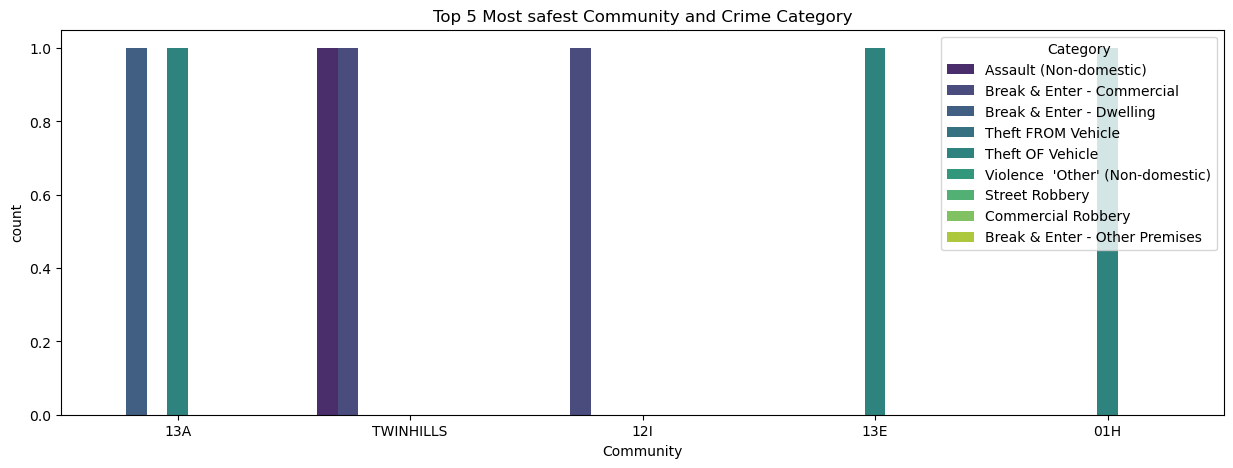

In [12]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Community', data = df, hue = 'Category', palette='viridis', order = df['Community'].value_counts().head(5).index).set_title('Top 5 Most dangerous Community and Crime Category')
sns.move_legend(plt.gca(), "upper right")
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Community', data = df, hue = 'Category', palette='viridis', order = df['Community'].value_counts().tail(5).index).set_title('Top 5 Most safest Community and Crime Category')

These two graphs shows the analysis of communities with crime category. This help us visualize the pattern of crime in each community. We can see that certain categories are more common in certain communities. In the top five dangerous communities, Forest Lawn has the highest of Break & Enter-other premises and Malbrough has the lowest Community Robbery.

<h1>Year and Category Analysis</h1>

Text(0.5, 1.0, 'Crime Reportings by Year and Crime Category')

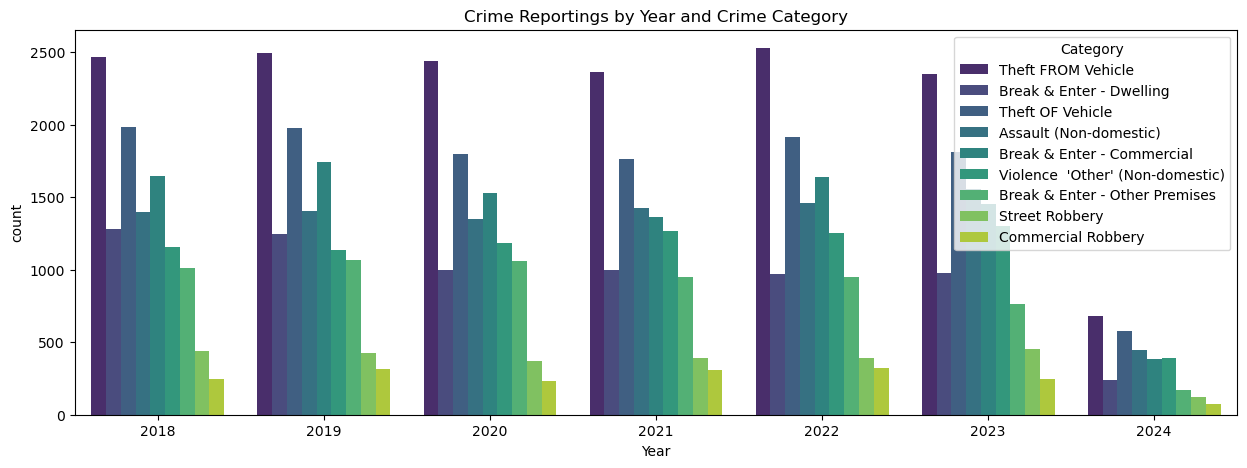

In [ ]:

plt.figure(figsize=(15,5))
sns.countplot(x = 'Year', data = df, hue = 'Category', palette='viridis').set_title('Crime Reportings by Year and Crime Category')


<h1>Month and Category Analysis</h1>

Text(0.5, 1.0, 'Crime Reportings by Month and Crime Category')

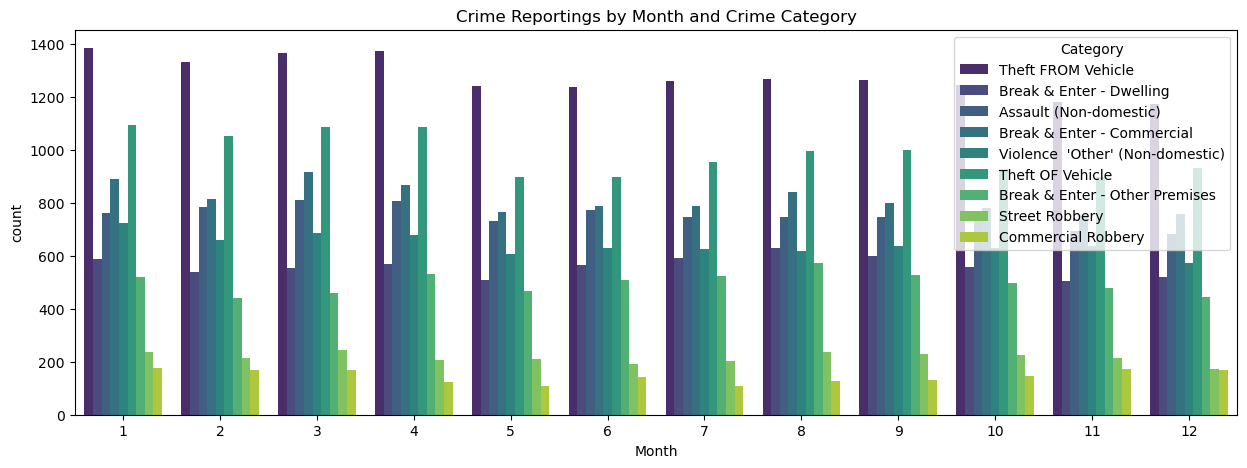

In [ ]:

plt.figure(figsize=(15,5))
sns.countplot(x='Month',data=df, hue='Category', palette='viridis').set_title('Crime Reportings by Month and Crime Category')

<h1>Data PreProcessing Part 2</h1>

In [15]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding Object
le = LabelEncoder()

# Object type columns
object_type_columns = df.select_dtypes(include='object').columns

# Label Encoding
for col in object_type_columns:
        df[col]=le.fit_transform(df[col])
df.head()

,Community,Category,Crime Count,Year,Month
0,0,0,1,2022,11
1,0,1,1,2019,6
2,0,1,1,2019,8
3,0,1,2,2020,3
4,0,1,2,2020,7


<h1>Building a Neural Network Model</h1>

In [16]:
# Prepare sequences for LSTM
def create_sequences(data, seq_length):
        xs=[]
        ys=[]
        for i in range(len(data)-seq_length):
                x = data.iloc[i:(i + seq_length)].to_numpy()
                y = data.iloc[i + seq_length]['Crime Count']
                xs.append(x)
                ys.append(y)
        return np.array(xs), np.array(ys)

In [17]:
seq_length = 3
X, y = create_sequences(df, seq_length)

<h1>Train Test Split</h1>

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

<h1>Building and Training LSTM Model</h1>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [20]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=16)


Epoch 1/100

3092/3092 [==============================] - 7s 2ms/step - loss: 21.1696 - val_loss: 5.4607
Epoch 2/100
3092/3092 [==============================] - 5s 2ms/step - loss: 6.5309 - val_loss: 4.7922
Epoch 3/100
3092/3092 [==============================] - 5s 2ms/step - loss: 5.7990 - val_loss: 5.0339
Epoch 4/100
3092/3092 [==============================] - 5s 2ms/step - loss: 5.8545 - val_loss: 4.9327
Epoch 5/100
3092/3092 [==============================] - 5s 2ms/step - loss: 5.8203 - val_loss: 4.7224
Epoch 6/100
3092/3092 [==============================] - 5s 2ms/step - loss: 5.7349 - val_loss: 5.1591
Epoch 7/100
3092/3092 [==============================] - 4s 1ms/step - loss: 5.4860 - val_loss: 5.4421
Epoch 8/100
3092/3092 [==============================] - 5s 1ms/step - loss: 5.7020 - val_loss: 4.6818
Epoch 9/100
3092/3092 [==============================] - 4s 1ms/step - loss: 5.8078 - val_loss: 6.7992
Epoch 10/100
3092/3092 [==============================] - 4s 1ms/step 

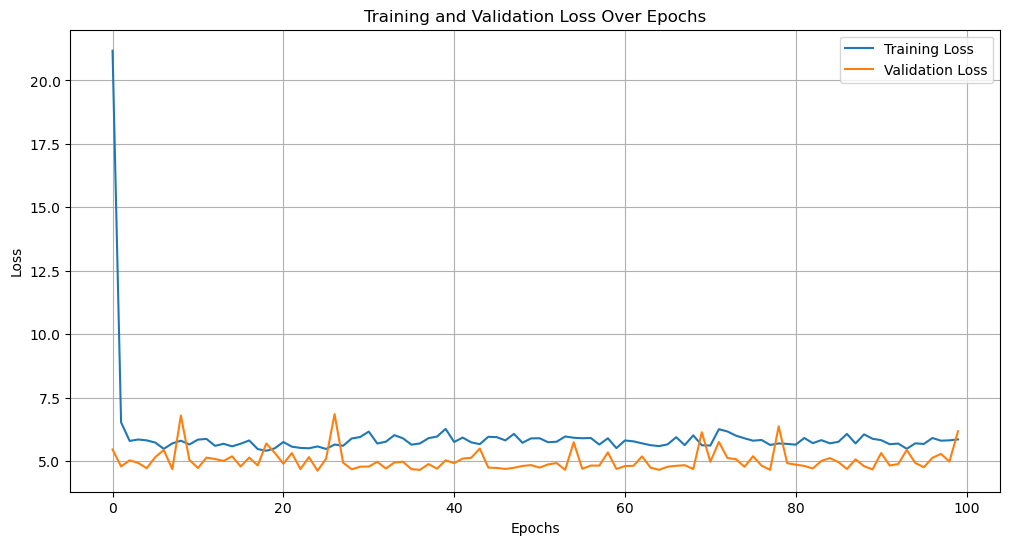

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Predictions
y_pred = model.predict(X_test)


print(f'Predictions: {y_pred.flatten()}')
print(f'True Values: {y_test.flatten()}')

332/332 [==============================] - 0s 1ms/step - loss: 5.9903
Test Loss: 5.990312576293945
332/332 [==============================] - 1s 855us/step
Predictions: [1.916701  1.9151783 1.9151783 ... 1.9151783 1.9151783 1.9151783]
True Values: [2 1 1 ... 1 2 2]


<h1>Model Evaluation</h1>

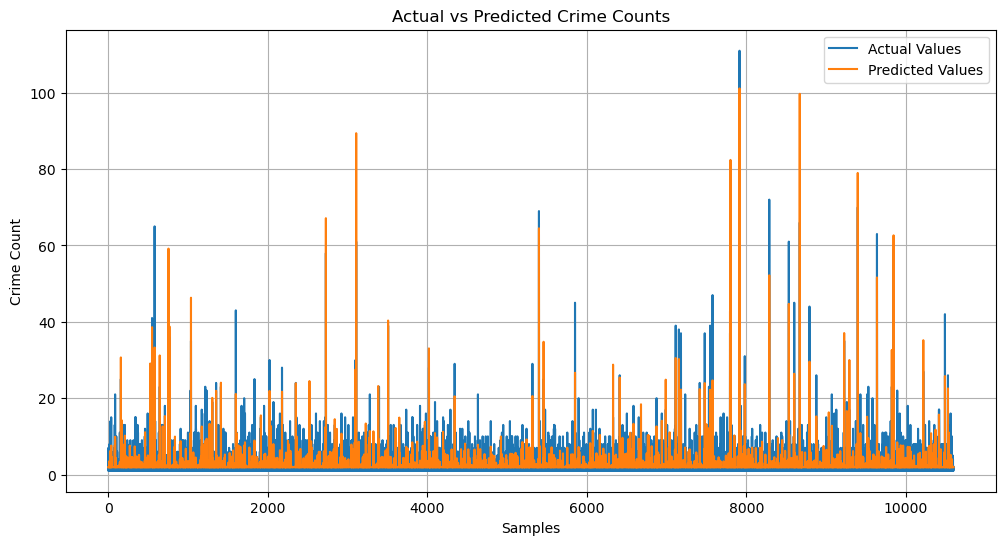

In [23]:
# Plotting Actual vs Predicted Values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.title('Actual vs Predicted Crime Counts')
plt.xlabel('Samples')
plt.ylabel('Crime Count')
plt.legend()
plt.grid(True)
plt.show()


The graph visually assesses how well the model's prediction with actual output.Here lines closely overlap, the model is accurately predicting the values.

<h1>Residual Plot</h1>

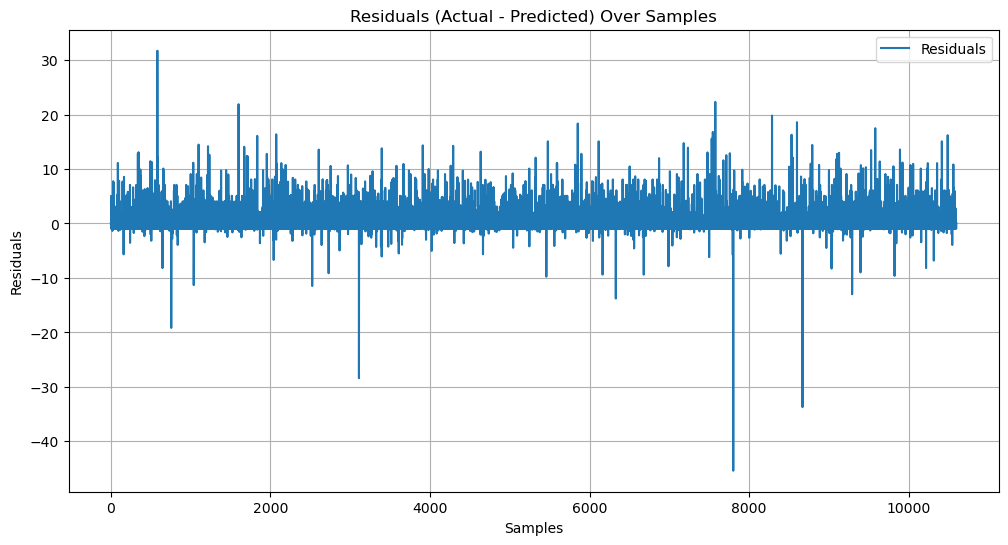

In [24]:
# Calculating residuals
residuals = y_test.flatten() - y_pred.flatten()

# Plotting residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals (Actual - Predicted) Over Samples')
plt.xlabel('Samples')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

Residual plot displays residuals, calculated as the difference between acatual and predicted values.
Residuals measure the error for each prediction. A good model should have residuals centered around zero with no discernible pattern.